<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0/%EB%94%A5%EB%9F%AC%EB%8B%9D/Section4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section4_Sprint3

# Note.1 


## 합성곱신경망 (Convolutional Nerual Network, CNN)   

- 컴퓨터비전에서 자주 사용된다.
- Flatten을 사용하면 공간적 특성을 살려내지 못하는 문제를 해결하기위해 등장

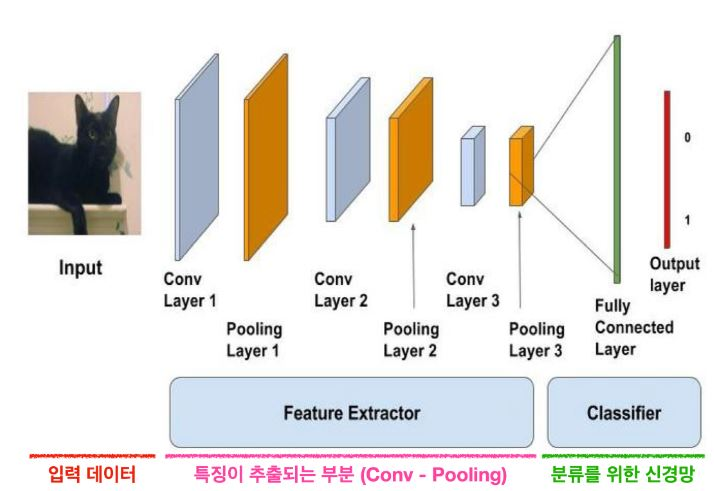

### 합성곱(Convolution)

- 합성곱 필터(Convolution Filter)가 슬라이딩하며 이미지의 특징을 읽어나간다.
- 필터 크기(Filter size), 패딩(Padding), 스트라이드(Stride)에 따른 Feature map 크기 변화

$$
N_{\text{out}} = \bigg[\frac{N_{\text{in}} + 2p - k}{s}\bigg] + 1
$$
- N(in) = input / p = padding / k= kernel / s = stride

In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D
model = Sequential()
model.add(Input(shape=(256,256,3)))      # 입력데이터(row, columns, channel)
model.add(Conv2D(Filters,                # 출력 채널 수
                 kernel_size(n,n),       # 필터의 크기 
                 padding="same or valid",# same은 strides 1일 때만 적용 그 외는 vaild 
                 strides=(n,n),          # 건너뛰기 크기
                 activation='relu' 
)

#### 필터(Kernel_size)
- 합성곱필터는 코드에서 Kernel_size로 사용
- Patch Data X Kernel Weight = Feature map(Output)   
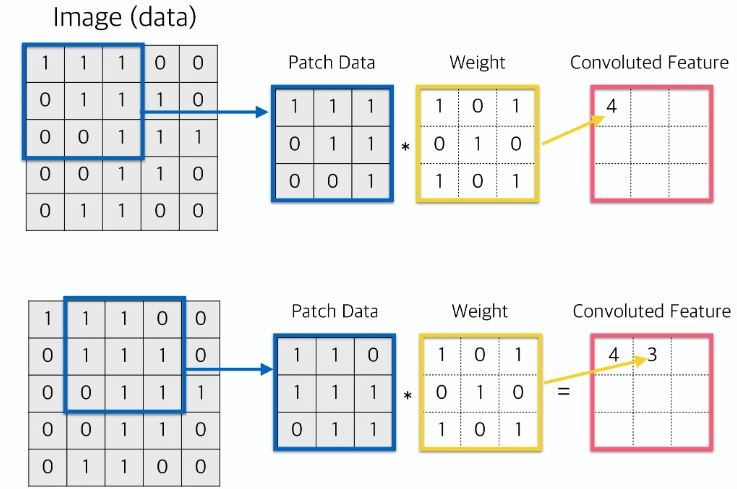

- 채널(Filters파라미터)의 수만큼 가중치행렬을 곱해주는데, 각각 다른 가중치로 곱해줌   
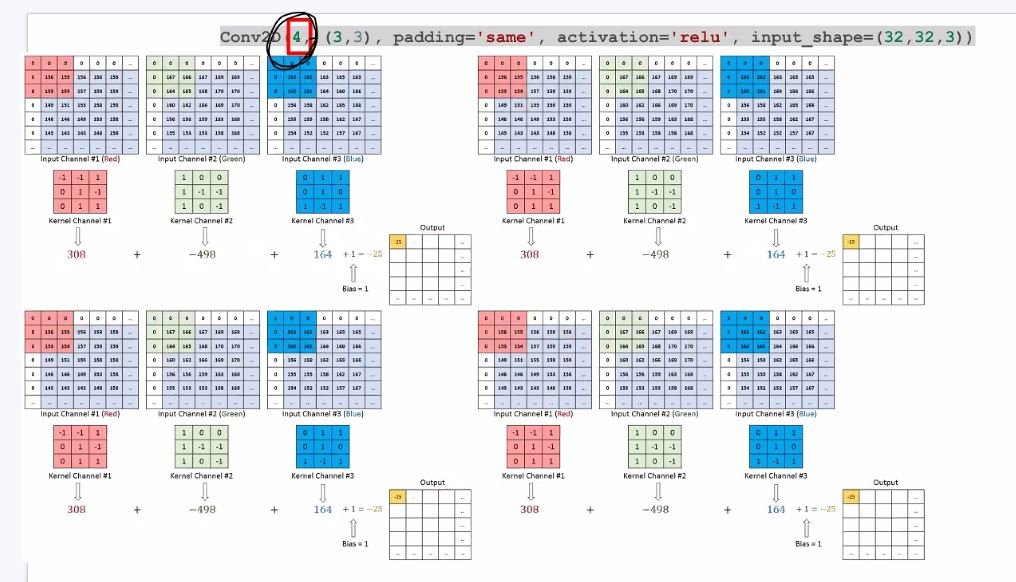

#### Padding : 이미지 외부를 특정값으로 둘러싸서 정보소실 최소화   
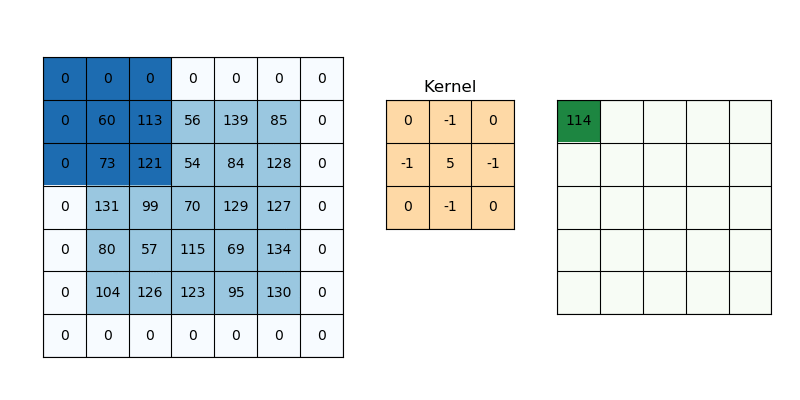

- padding ='same'은 strides가 1일 때, 입력사이즈와 출력사이즈를 동일하게 만듬

In [ ]:
# 위 그림 코드
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D
model = Sequential()
model.add(Input(shape=(5,5,1)))     
model.add(Conv2D(1,                   
                 kernel_size=(3,3),    
                 padding="same"
))
# ((입력데이터 -커널사이즈 +2*패딩)/스트라이드)+1
# ((5 - 3 + 2*1)/1)+1 = 5(Feature map 5x5)

#### Stride : 슬라이딩시 보폭을 의미   
- **Stride = 1**   
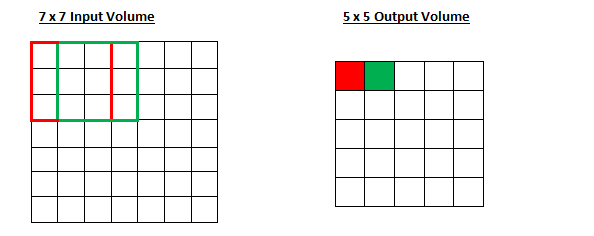   

- **Stride = 2**   
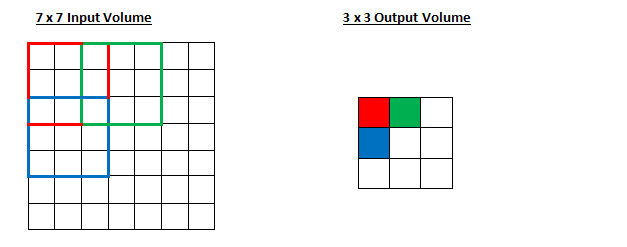   

In [ ]:
# pad의 개수를 출력하는 함수
import math

def pad(stride_height, in_height, filter_height):
    if (in_height % stride_height == 0):
        pad_along_height = max(filter_height - stride_height, 0)
    else:
        pad_along_height = max(filter_height - (in_height % stride_height), 0)

    padd = math.floor(pad_along_height/2) # pad_along_height는 위, 아래 패딩해준 개수 모두를 더한 값이라서, 2일 때 결국 패딩 값은 1임

    feature_map = ((in_height-filter_height+2*padd)/stride_height)+1
    return print(f"패딩 :{padd}, Output :{math.floor(feature_map)}")

# stride, input, kernel
print(pad(3, 28, 3))

In [ ]:
# 실제 계산 코드(그림에 바이어스(+5) 더해주는거 빼먹음)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()
model.add(Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 3),padding='same',strides=(3,3)))
model.add(
    MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.summary()

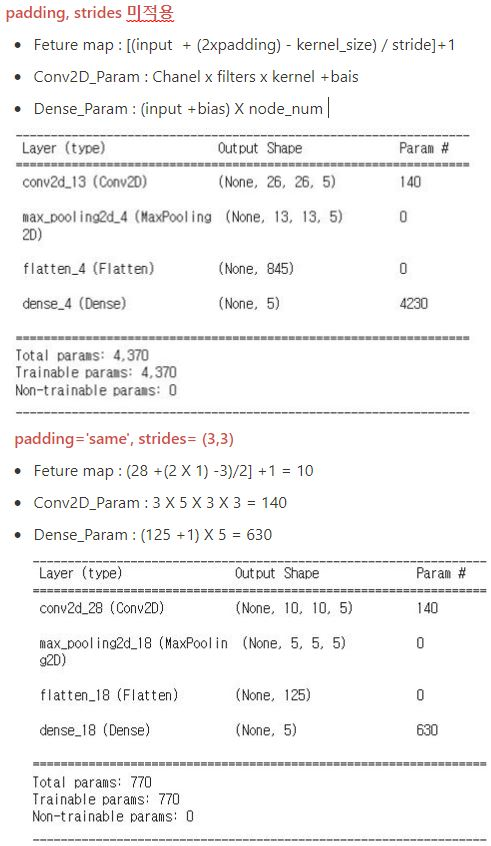

### 풀링(Pooling)

- 데이터의 차원을 축소시켜서 연산량을 줄이는 기법
- 가중치 학습이 없어서 Channel 수를 변화시키지 않는다.(=Param이 생성되지 않음)
- 각 특징을 잘 보존하려면 Max로, 아니면 Average로 사용

**pooling**   
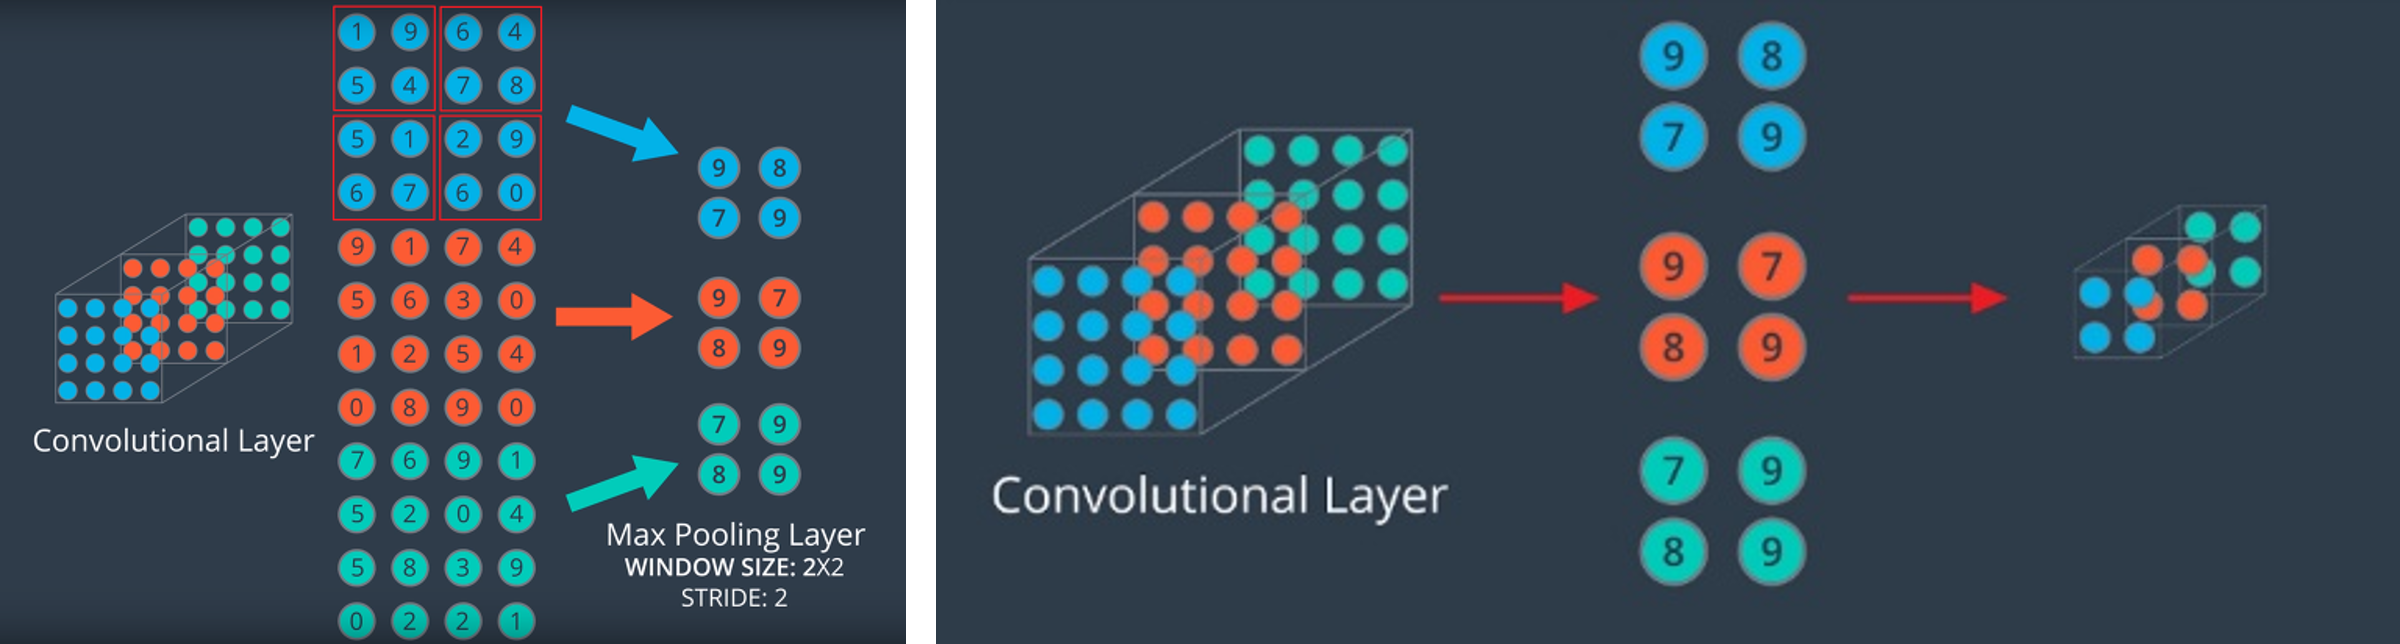

Gloval Pooling   
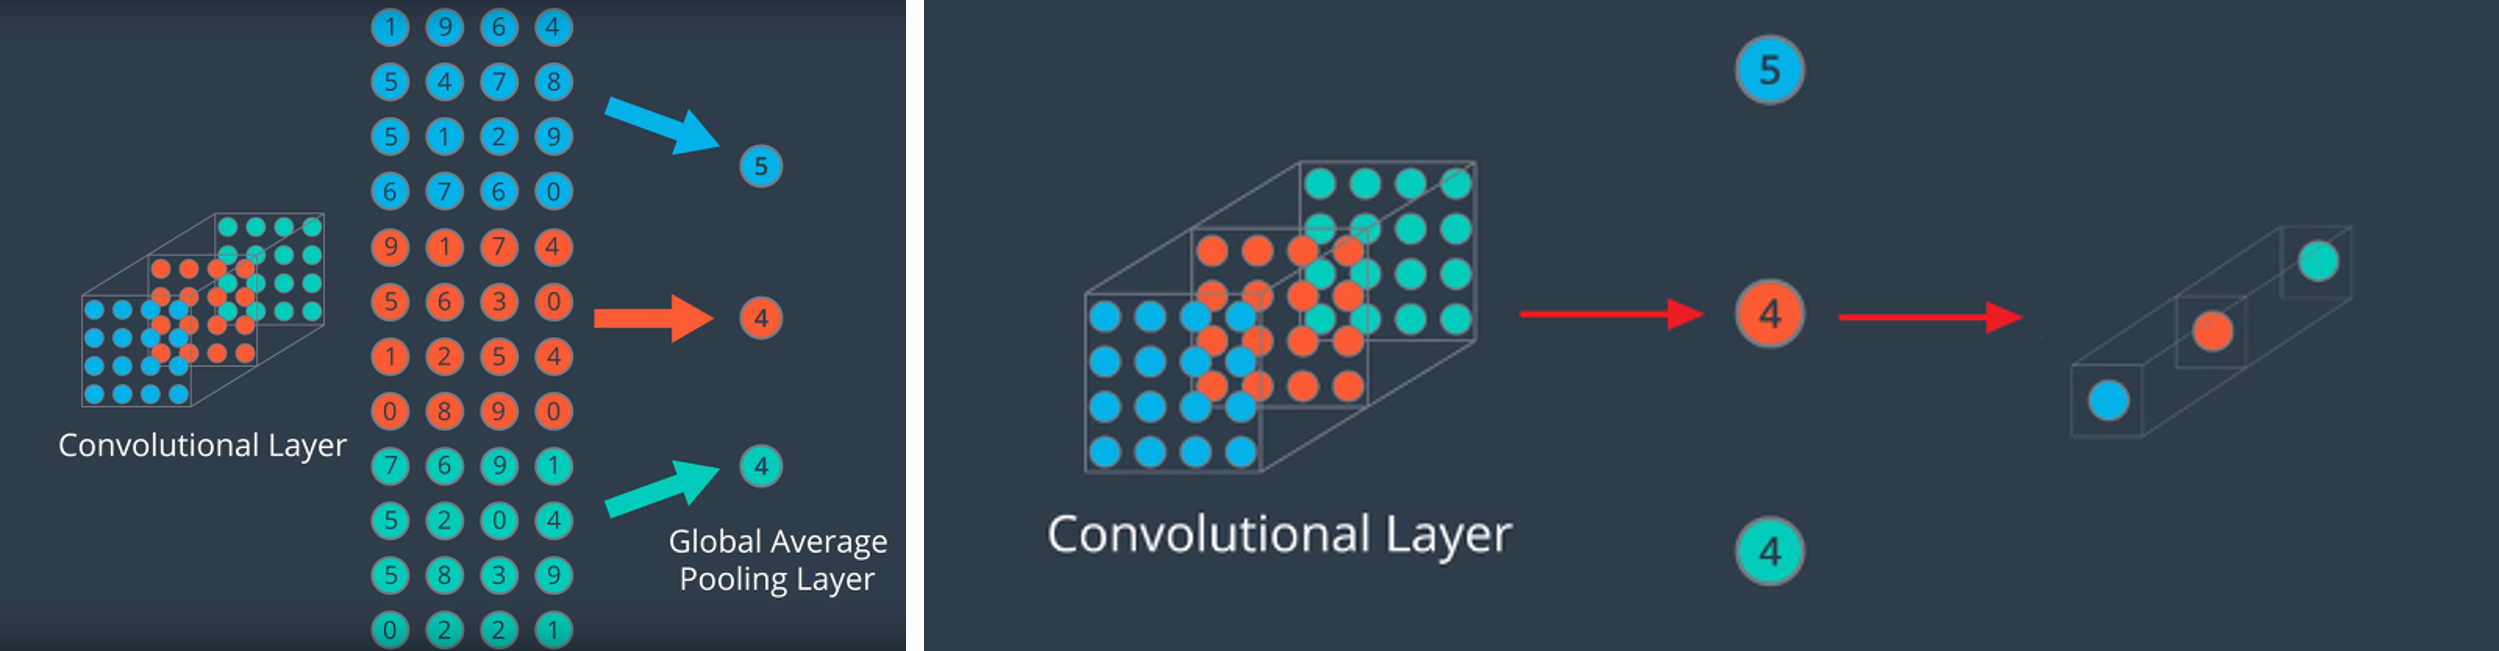

In [ ]:
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

model.add(MaxPooling2D((2, 2)))
model.add(AveragePooling2D((2, 2)))

### Code Flow

In [ ]:
# cifar10 데이터 훈련
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10

In [ ]:
# 시드고정
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터셋 정규화
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# 데이터셋 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

In [ ]:
# 특징추출
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# 출력클래스 10개, loss 확인
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 훈련
from tensorflow.keras.callbacks import EarlyStopping

model.fit(X_train, y_train,
          batch_size=128,
          validation_data=(X_val, y_val),
          epochs=10,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.01, patience=3)])

### Skip connection 
- 가중치학습이 된 f(x)에 가중치 학습이 되지않은 x를 더해줘서 기울기소실 방지

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(5, (3,3), padding='same', activation='relu'))
# skip
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
#함수형 API
input = Input(shape=(256, 256, 3))
conv1 = Conv2D(5, (3,3), padding='same', activation='relu')(input)
skip1 = tf.concat([input, conv1], axis=-1)
flat1 = Flatten()(skip1)
output = Dense(10, activation='softmax')(flat1)

model2 = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
model2.summary()

In [ ]:
tf.keras.utils.plot_model(model2)

## 전이학습(Transfer Learning)

- 대량의 데이터를 학습한 사전 학습 모델의 가중치를 그대로 가져와 분류기(완전신경망)부분만 설계하는 방법
- 일반적으로 사전학습의 가중치는 고정한채로 진행되어 빠르게 좋은 결과를 얻을 수 있다.


#### VGG
- 모든 합성곱 층에 3X3필터사용 (층을 깊게 쌓아 7x7이나 11x11보다 표현력이 좋음)
- 활성화 함수로 ReLU를 사용하고 가중치 초깃값으로 He 초기화를 사용(층이 깊어도 기울기소실X)
- 완전 연결 층에 Dropout을 사용하여 과적합을 방지, Optimizer는 adam을 사용

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
# VGG를 이미지넷의 학습가중치로 불러와서, 따로 학습을 진행하지 않음
pretrained_model = VGG16(weights='imagenet', include_top=False)

#### GoogleNet(Inception)
- 가로방향으로 층을 넓게 구성(Inception구조)하고 크기가 다른 필터와 풀링을 병렬적으로 적용


#### ResNet
- Residual Connection(=Skip Connection)
- 층을 거친 F(x)에 층을 거치지 않은 x를 더해주어  기울기 소실 해결   
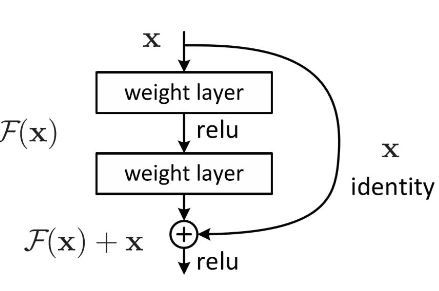

In [ ]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False) # weights = 이미지넷데이터 훈련 가중치 그대로, include_top =False 기존 분류기 제거하고 불러오기

# resnet의 파라미터를 학습하지 않도록 해줌
for layer in resnet.layers: 
    layer.trainable = False

# 분류기를 제거하고 가져왔기 때문에, 분류기 생성
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # 출력층을 설계합니다.
model = Model(resnet.input, predictions)

In [ ]:
# 이미지 보기
plt.imshow(이미지, '색상')

# x 를 뒤에 타입으로 변경
tf.cast(x, tf.float)

## 이미지 증강(Image Augmentation) 

- 사람처럼 일반화가 잘되는 모델을 만들기위해서 데이터를 변형시키는 방법
- 늘리기, 줄이기, 회전, 반전, 자르기, 밝기나 채도 변화 등

In [ ]:
RandomFilp 상하 좌우 반전
rotation 각도 조절
tf.dexpand_dims(image, 0) 이미지 확장

image_augmentation : 같은 이미지가 다르게 보이도록 하는 것

AUTOTUNE

# Note2.

## 분할(Segmentation)

- 하나의 이미지에서 같은 의미를 가진 부분을 구분하는 task
- 동일한 의미마다 해당되는 픽셀이 모두 레이블링 되어있는 데이터셋을 픽셀단위로 하여 레이블 예측

#### **Semantic Segmentation(의미적 분할)** : 의미적으로 같은 개체에게 동일한 라벨링   
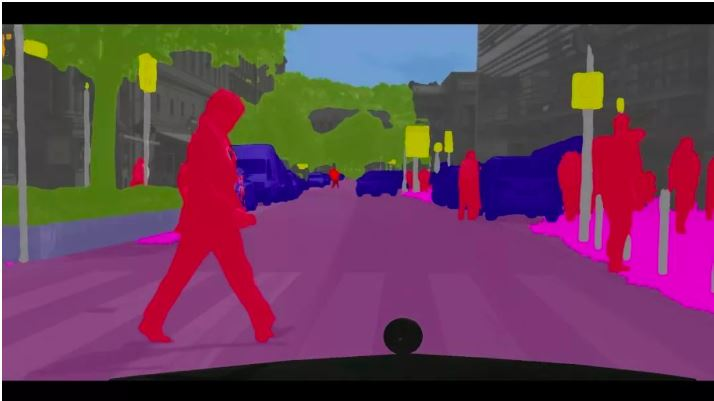

#### **Instance Segmentation** : 의미가 같아도 다른 라벨링   
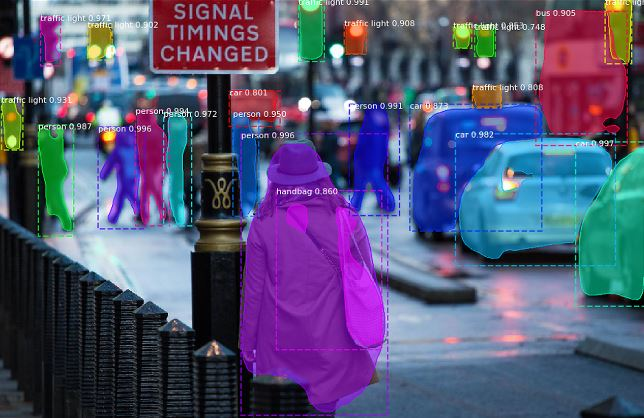

#### Segmentation 예제

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git  
!pip install -U tfds-nightly # tf의 데이터셋 라이브러리 설치

In [ ]:
# 고양이 강아지 이미지 데이터셋, tfds.load
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# 'oxford_iiit_pet:3.*.*'데이터를 dataset에 저장.
# with_info = True : info에 메타데이터를 저장하겠다.
# as_supervised = True : 데이터를 dict가 아닌 Tuple로 받겠다.
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True,  as_supervised=False)

전처리 함수

In [ ]:
def normalize(input_image, input_mask):
    """
    이미지를 정규화하는 코드입니다.
    각 픽셀값을 최댓값인 255로 나누어줍니다.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1 # 인덱스가 1,2,3,4로 시작하는걸 0,1,2,3으로 바꿔주는 작업
    return input_image, input_mask

In [ ]:
@tf.function
def load_image_train(datapoint):
    """
    훈련 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 이미지 증강에 해당하는 filp 및 정규화를 적용합니다.
    보통 이미지증강은 train데이터에만 사용한다.(val, test는 사용안함)
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128)) # 사이즈 128x128로 변경
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5: # 균등분포에서 무작위로 추출하여
        input_image = tf.image.flip_left_right(input_image) # 0.5가 넘으면 이미지를 가로세로 전환
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [ ]:
def load_image_test(datapoint):
    """
    시험 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

train, test데이터에 함수를 적용하여 전처리하고, 정의함

In [ ]:
TRAIN_LENGTH = info.splits['train'].num_examples # train 데이터의 샘플 수
BATCH_SIZE = 64

# 0~999인덱스 데이터를 섞어주고, 다음 1000~1999번째 인덱스를 섞어주고 tf.data.Dataset.shuffle(buffer_size)
BUFFER_SIZE = 1000

# fit의 파라미터, 한 에포크를 몇 스탭으로 학습할것인지 보통 (데이터수/배치사이즈) 나머지값은 버려도됨
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE 

In [ ]:
# num_parallel_calls : 병렬처리의 레벨 지정(높게 설정하면 너무 커짐)
# 데이터는 3D Numpy배열 형태로 (진짜그림, Segmentation그림)으로 되어있음
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [ ]:
'''
df.cache() :
컴퓨팅에서 캐시는 일반적으로 일시적인 특징이 있는 데이터 하위 집합을 저장하는 고속 데이터 스토리지 계층입니다. 
따라서 이후에 해당 데이터에 대한 요청이 있을 경우 데이터의 기본 스토리지 위치에 액세스할 때보다 더 빠르게 요청을 처리할 수 있습니다. 

df.shuffle.(BUFFER_SIZE):
데이터를 버퍼사이즈 단위로 섞어줌 데이터가 100개일때 버퍼사이즈가 10이면 인덱스 0~9, 10~19 단위로 섞어줌

batch():
데이터를 배치단위로 묶어줌 
dataset = tf.data.Dataset.range(4)
dataset = dataset.batch(2)
list(dataset.as_numpy_iterator())
[0,1,2,3] 데이터에 batch(2) => [array([0, 1]), array([2, 3])]로 묶음

repeat(n) :
n개만큼 반복 숫자없으면 계속반복

df.prefetch(n):
데이터 n개의 배치가 미리 준비되도록 설정, 일반적으로 하나도 충분,
tf.data.experimental.AUTOTUNE을 전달하면 텐서플로가 자동으로 결정

tf.data.experimental.AUTOTUNE:
AUTOTUNE을 지정하면 알아서 맞는값을 동적으로 지정해주는듯
'''
# train데이터를 BUFFER_SIZE로 섞어서 BATCH_SIZE단위로 묶은 데이터를 반복생성
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

Segmentation이 잘 되었을 때 

In [ ]:
import matplotlib.pyplot as plt

def display(display_list):
    """
    입력 이미지와 타겟 레이블, 예측 레이블의 결과를 시각화하는 함수입니다.
    """
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        # tf.keras.preprocessing.image.array_to_img() :3D Numpy 배열을 PIL 이미지 인스턴스로 변환합니다.
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [ ]:
# 숫자번째 데이터 함수에 넣어서 확인(실제로는 2로 설정하면 2개의 데이터를 불러오는데 마지막꺼만 저장되니까..)
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask

display([sample_image, sample_mask])

**모델 정의**   
- U-net을 사용하진 않고, 구조만 만들어볼 것
- MobileNet V2의 일부층을 사용해서 Downsampling
- Keras Pix2Pix를 활용하여 Upsampling

In [ ]:
# MobileNet Downsampling
# 사진, 세그, 예측사진으로 출력할 예정
OUTPUT_CHANNELS = 3

base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)# 분류기제거

layer_names = [
    'block_1_expand_relu',   # 64x64 input/stride (Convolution이니까)
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]

# get_layer(name) 이름에 해당하는 레이어 가져오기
layers = [base_model.get_layer(name).output for name in layer_names]


down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

# 모델의 역전파 학습 X
down_stack.trainable = False

In [ ]:
# Pix2Pix Upsampling
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8 input*stride (TransposeConvolution이니까)
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
# U-net모양으로 함수 구현
from tensorflow_examples.models.pix2pix import pix2pix
from IPython.display import clear_output

def unet_model(output_channels):
    """
    모델을 정의하는 함수입니다.
    """
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling
    skips = down_stack(x)
    x = skips[-1]                # x = 다운샘플 마지막층
    skips = reversed(skips[:-1]) # skips = 다운샘플층을 거꾸로 뒤집은 리스트

    # Upsampling
    for up, skip in zip(up_stack, skips): # 업샘플링과 다운샘플링을 뒤집은 형태
        x = up(x)                         # 업샘플링에 다운샘플링 마지막층을 연결
        
        concat = tf.keras.layers.Concatenate()  
        x = concat([x, skip])                  # Downsampling 결과를 Concatenate 해줍니다.(기울기소실 예방)

    # 출력되는 이미지 크기를 동일하게 하기 위해 마지막 층을 구현합니다.
    last = tf.keras.layers.Conv2DTranspose(output_channels, 
                                           3, 
                                           padding='same',
                                           strides=2        )  # 마지막층 인풋 64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
model = unet_model(OUTPUT_CHANNELS)

model.compile(optimizer='adam',
              # 출력값이 nomalize되어 있으면(softmax처럼) False 아니면 nomalize되어있지 않으면True
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

모델의 예측을 보여주는 함수와 학습 중에 해당 함수를 동작할 수 있도록 Callback을 정의합니다.

In [ ]:
def create_mask(pred_mask):
    """
    예측 시 픽셀의 레이블을 확정하는 함수입니다.
    """
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
    """
    예측한 레이블을 시각화하는 함수입니다.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
show_predictions()

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
    """
    에포크마다 보여줄 수 있되
    매 에포크마다 이전 결과가 지워지도록 하는 Callback 클래스 입니다.
    """
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

**모델학습**

In [ ]:
EPOCHS = 20
VAL_SUBSPLITS = 5
# validation_steps: steps_per_epoch이 특정된 경우에만 유의미합니다. 
# 정지 전 검증할 단계(샘플 배치)의 총 개수입니다.
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

In [ ]:
# 학습곡선
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
# 예측
show_predictions(test_dataset, 3)

### 분할모델

#### FCN(Fully Convolutional Networks)

- 기존 CNN의 분류기 부분인 완전 연결 신경망부분을 합성곱층으로 대체한 모델
- 기존 CNN의 Flatten이 위치정보를 손상시키던 문제를 해결
- 픽셀별로 분류를 진행하기 때문에 원래 이미지 크기와 비슷하게 Upsampling해주어야함   
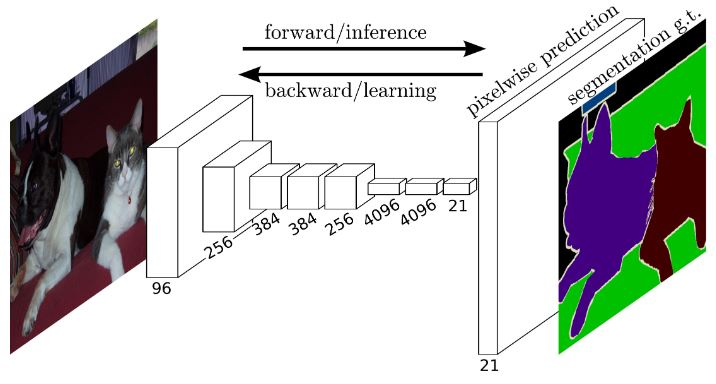

##### Upsampling
- CNN의 특징추출 부분을 Downsampling이라고 한다.
- Downsampling을 통해 작아진 이미지를 원래 크기로 키우는 과정
- Transpose Convolution을 사용한다.
- 픽셀 x 커널에 Stride를 주어 이미지를 키워 나감   
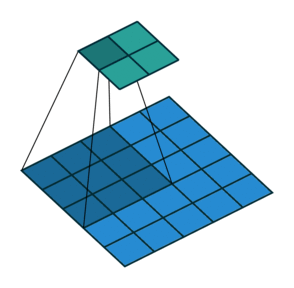   
input = (2,2) , Kernel_size = (3,3)인 그림의 Transpose Convolution

#### U-net

- Downsampling과 Upsampling 두 부분으로 나눔
- Downsampling에서 Convolution + Maxpooling으로 이미지 특징 추출
- Upsampling에서 Convolution + Transpose Convolution으로 이미지 크기 복원
- 각 Upsampling에 Downsampling의 Featuremap의 일부를 잘라 붙여줌(=skip connection)   
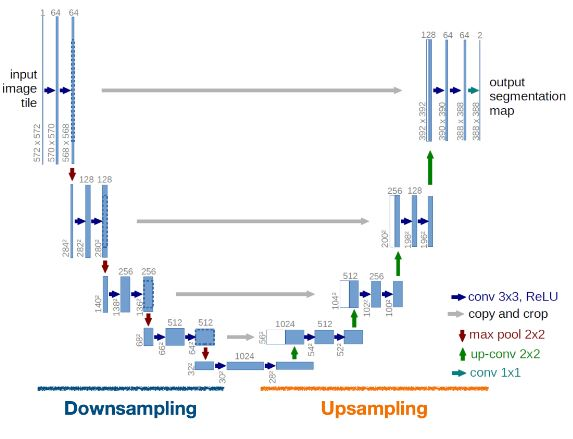

## 객체 탐지/인식(Object Detection/Recognition)

- 전체 이미지에서 레이블에 맞는 객체를 찾는 Task
- Bounding Box를 만든 후 박스 내의 객체의 클래스를 분류한다.   
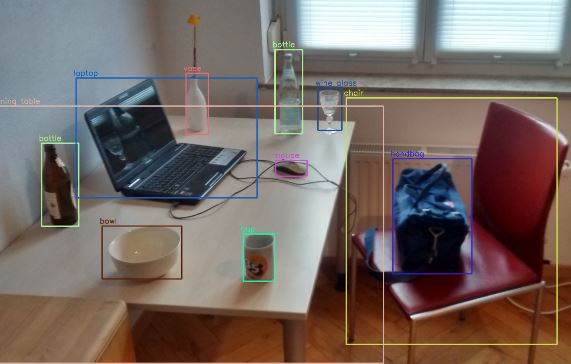

### IoU(Intersection over Union)

- 객체탐지 평가지표(높을 수록 잘 예측하는 것)
- 정답에 해당하는 Bounding Box를 Ground_truth라고 부름
- 분류 방식에 따라 Two Stage Detector와 One Stage Detector로 나뉨

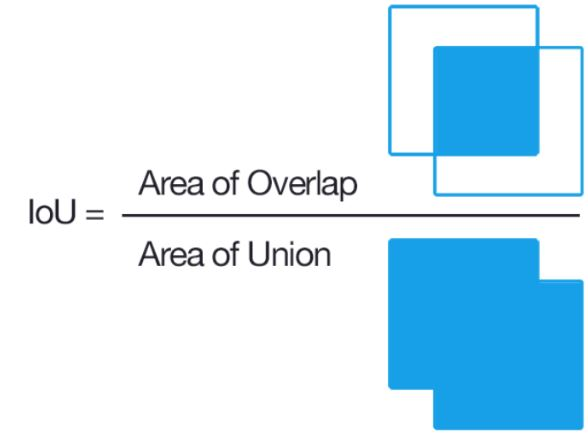   
IoU = 정답과 예측의 교집합 / 정답과 예측의 합집합

#### Two Stage Detector

- Region Proposal : 객체가 있을만한 곳을 추천 받음(수많은 객체를 예측해봄)
- Classification : 추천받은 RoI(Region of Interest)에 대해 분류(CNN) 수행
- 대표모델 : R-CNN계열(R-CNN, Fast R-CNN, Faster R-CNN 등)   
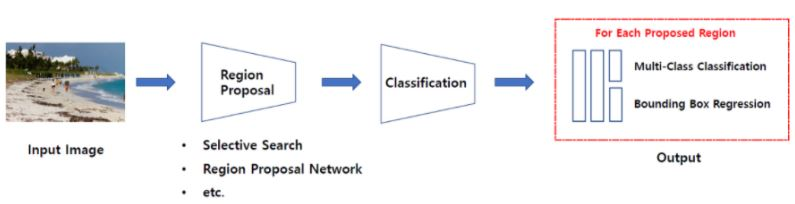

#### One Stage Detector

- 입력이미지를 Grid같은 작은 공간으로 나눈 뒤 해당 공간을 탐색하며 분류를 수행
- 연산속도가 빨라서 영상등에 많이 쓰였었지만 성능이 떨어짐   
- 대표모델 : SSD(Single Shot multibox Detector)계열과 YOLO(You Only Look Once)계열   
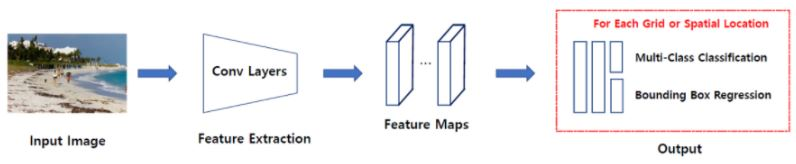

# Note.3 AutoEncoder

- 입력데이터를 저차원의 벡터로 압축 한뒤 원래 크기의 데이터로 복원하는 신경망   
- 원본데이터보다 차원이 작으면서 특징을 잘 보존한 벡터를 Latent벡터(잠재)라고한다.(Code부분)
- 궁극적으로 오토인코더는 잠재벡터를 잘 얻기 위한 방법이다.

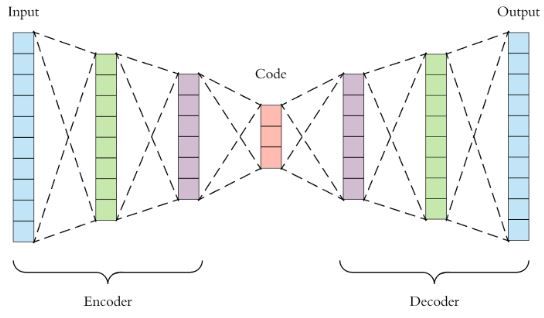

**AutoEncoder 활용**
1. 차원축소(Dimensionality Reduction)와 데이터 압축
2. 데이터 노이즈 제거(Denoising)
3. 이상치 탐지(Anomaly Detection)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 원본데이터를 넣었다 빼는거라서 레이블 필요없음
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
# 28x 28이기 때문에 Flatten으로 하면 784차원
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# 잠재 벡터(Latent vector)의 차원 수를 정해줍니다.(784=>64로 줄일것)
LATENT_DIM = 64

In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim                     # 잠재백터
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),                            # 28x28 => 784차원
            layers.Dense(latent_dim, activation='relu'), # 784차원 => 잠재벡터
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),     # 잠재벡터 -> 784차원
            layers.Reshape((28, 28))                     # 784 => 28x28   
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
model = Autoencoder(LATENT_DIM)

model.compile(optimizer='adam',
              loss='mse')

model.fit(x_train, x_train,
          epochs=10,
          shuffle=True,
          validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0235 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [ ]:
# 평가데이터를 오토인코딩
encoded_imgs = model.encoder(x_test).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

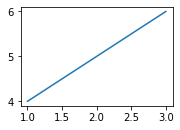

In [ ]:
ax = plt.subplot(2,2,2)
plt.plot([1,2,3],[4,5,6])

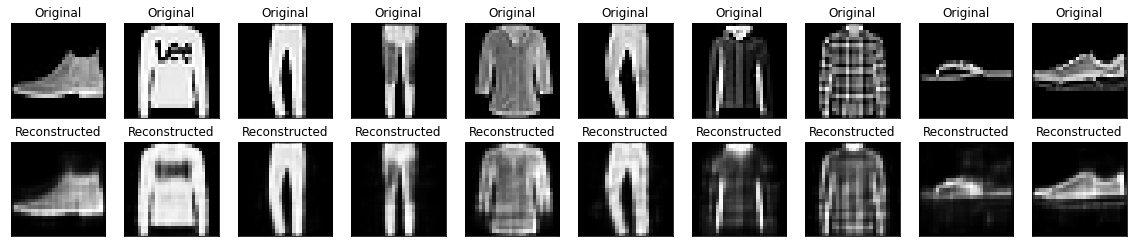

In [ ]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 원본 이미지를 출력합니다.
    ax = plt.subplot(2, n, i + 1) # (행,열,인덱스) 1~10
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # AutoEncoder에 의해서 복원된 이미지를 출력합니다. 11~20
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()